 ## PCA Dataset Analysis
 The goal of this notebook is to review the PCA algorithm outputs on the simulated datasets.  The
 [**Silhoutte Score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
 metric value will be computed for each of the datasets.  This value is a metric that trys to determine
 how well the different samples cluster together.  The best value is 1.0 and the worst value is -1.0.  It will
 be used to compare the datasets against each other.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn import metrics
from src.models.encoders.levelmulti import LevelMulti
from src.models.pipelines.pipelines import pca_pipeline

mpl.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (8, 6)


In [2]:
def load_data(filename):
    df = pd.read_csv(filename, index_col=0)
    ylevel = df['level'].values.copy()    
    dfData = df.drop(['level', 'blexp'], axis=1).copy()
    return ylevel, dfData.values.copy()

def plot_data(title, y, X):
    ylabels = LevelMulti(targetmin=0.2, targetmax=0.8).transform(y)
    ylabel0 = np.nonzero(ylabels == 0)[0]
    ylabel1 = np.nonzero(ylabels == 1)[0]
    ylabel2 = np.nonzero(ylabels == 2)[0]  

    fig, axs = plt.subplots()
    l = axs.scatter(X[ylabel0, 0], X[ylabel0, 1], s=10, c='black', marker='o')
    n = axs.scatter(X[ylabel1, 0], X[ylabel1, 1], s=10, c='blue', marker='o')
    h = axs.scatter(X[ylabel2, 0], X[ylabel2, 1], s=10, c='red', marker='o') 
    axs.set_xlabel('PCA 1')
    axs.set_ylabel('PCA 2')
    axs.set_title(title)
    plt.legend((l, n, h), ('low', 'norm', 'high'), scatterpoints=1)  
    plt.show()
    return ylabels   

def pca_plot(dsver, dsname):
    ydata, Xdata = load_data('./data/processed/ds{0:04d}-{1}-train.csv'.format(dsver, dsname))
    ppca = pca_pipeline(ncomponents=2)
    Xpca = ppca.fit_transform(Xdata)
    labs = plot_data('PCA {0} Dataset'.format(dsname.capitalize()), ydata, Xpca) 

    score = metrics.silhouette_score(Xpca, labs)   
    print('PCA {0} Silhouette Score: {1:.4f}'.format(dsname.capitalize(), score))    


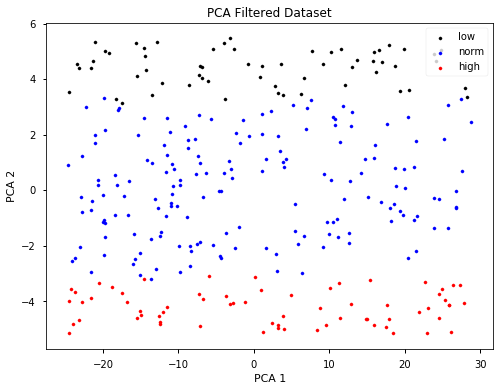

PCA Filtered Silhouette Score: 0.0266


In [3]:
pca_plot(2, 'filtered')


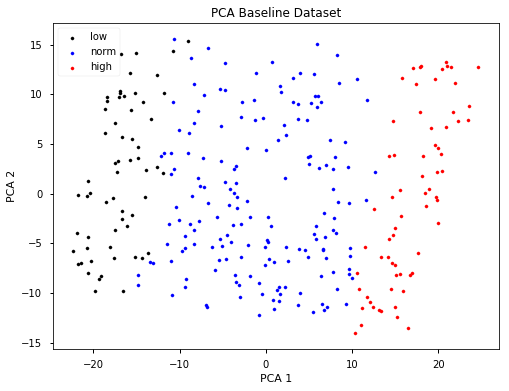

PCA Baseline Silhouette Score: 0.2786


In [4]:
pca_plot(2, 'baseline')


 ## PCA Dataset Results
 Using the PCA algorithm, the **Silhoutte Score** is signficantly higher for the dataset that includes
 the baseline correction step.  This is an expected result since the goal of baseline correction is to
 remove the variance from the data that is not related to the actual target signal.